# Analysis 

## Import libraries

In [1]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as skl
import pickle
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report,accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

import re
from collections import Counter


## Read the heart.csv data from the Data folder into a Pandas DataFrame.

### Variable information:

* **Age**:Age of the patient [years]

* **Sex**: Sex of the patient [M: Male, F: Female]

* **ChestPainType**:Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* **RestingBP**: Resting blood pressure [mm Hg]

* **Cholesterol**: Serum cholesterol [mm/dl]

* **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]

* **ExerciseAngina**:Exercise-induced angina [Y: Yes, N: No]

* **Oldpeak**:[Numeric value measured in depression]

* **ST_Slope**:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* **HeartDisease**: Output class [1: heart disease, 0: Normal]

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

df = pd.read_csv("Data/heart.csv")

display(df.head())
display(df.tail())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [3]:
## Compute the size of the dataset
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Data Cleaning

In [5]:
#checking for null values
pd.isnull(df).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
#checking for duplicate values
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


**As you can see in the described table, it shows that the minimum resting blood pressure is 0, that is not possible, so we are going to delete that row.**

In [8]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [9]:
df.drop(index=df[df['RestingBP']==0].index,inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,199.016358,109.246330,0.0,174.0,223.0,267.0,603.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0


In [11]:
# checking the unique values in the df
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          66
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

## Exploration and Visualization

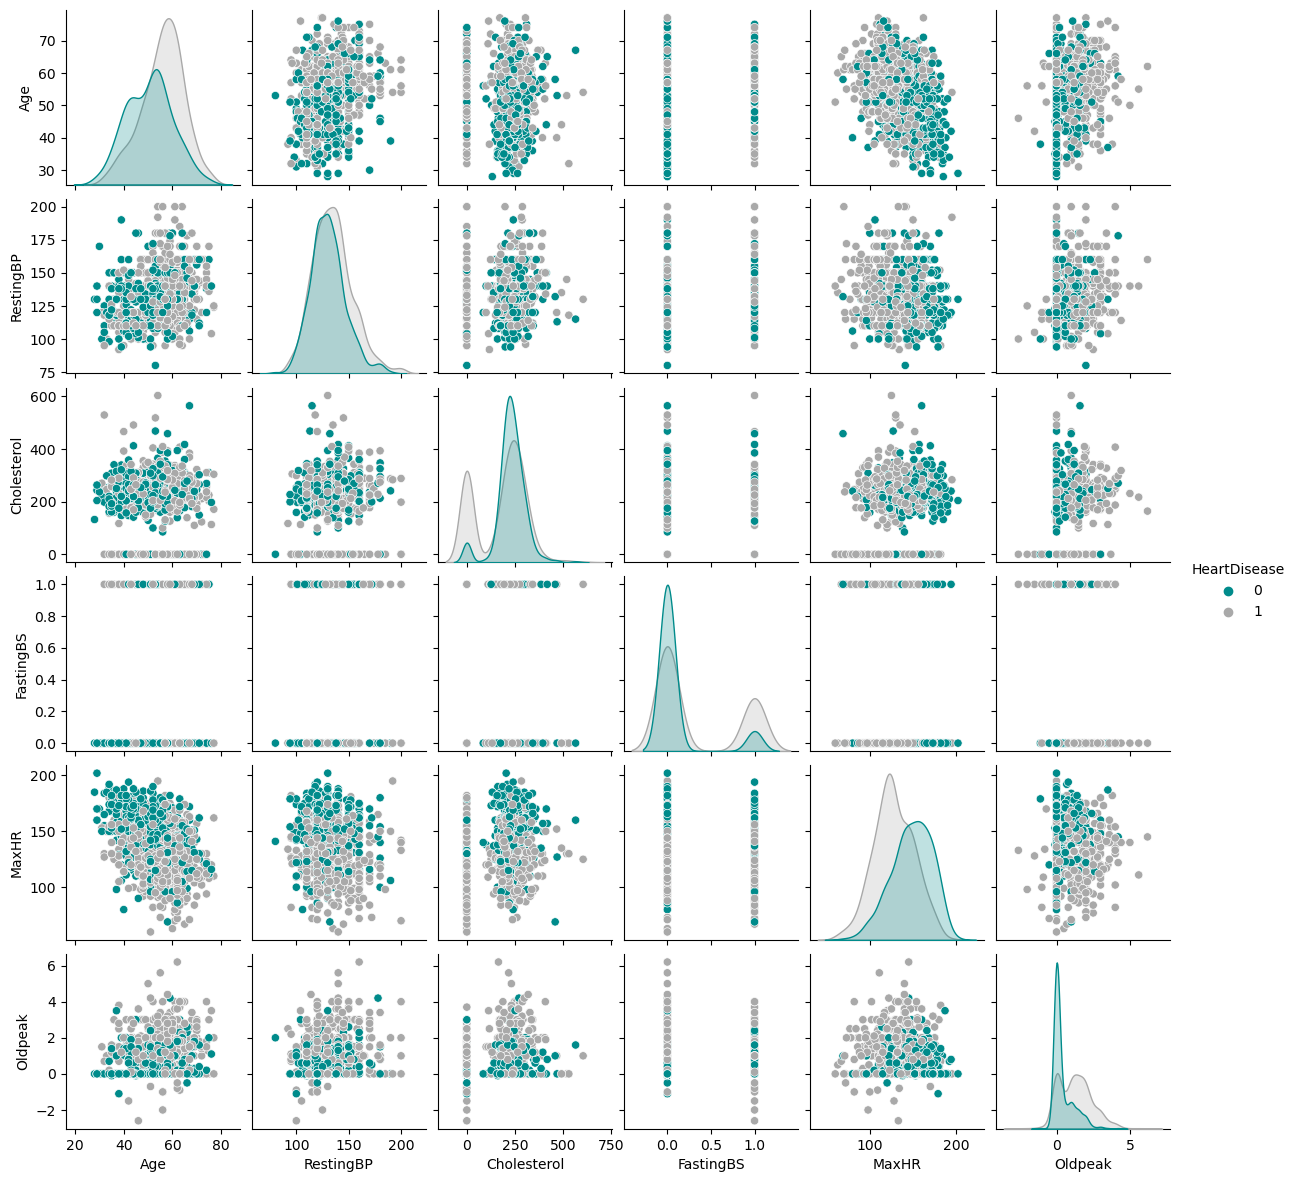

In [12]:
custom_colors = ["darkcyan", "darkgrey"]
sns.pairplot(df,hue = 'HeartDisease', height = 2, palette=custom_colors)

In [13]:
#calculate correlation matrix
numeric_values = df.select_dtypes(include=['float64', 'int64'])

numeric_values = numeric_values.corr()

numeric_values

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263084,-0.095142,0.198170,-0.382280,0.258563,0.282012
RestingBP,0.263084,1.000000,0.089392,0.067823,-0.109693,0.174252,0.117990
Cholesterol,-0.095142,0.089392,1.000000,-0.262585,0.237705,0.051390,-0.231479
FastingBS,0.198170,0.067823,-0.262585,1.000000,-0.131067,0.053062,0.267994
MaxHR,-0.382280,-0.109693,0.237705,-0.131067,1.000000,-0.161213,-0.401410
Oldpeak,0.258563,0.174252,0.051390,0.053062,-0.161213,1.000000,0.403638
HeartDisease,0.282012,0.117990,-0.231479,0.267994,-0.401410,0.403638,1.000000


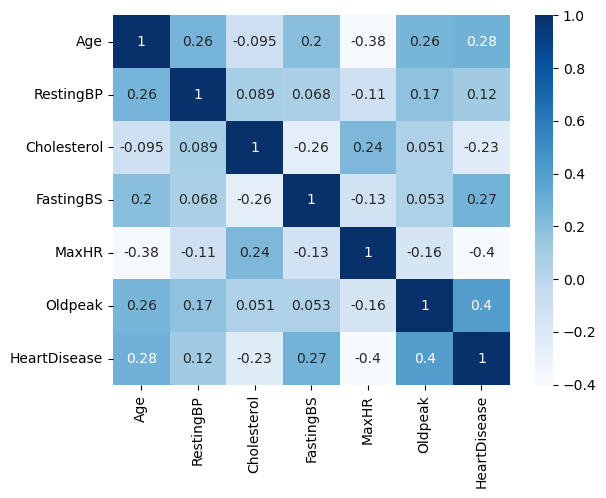

In [14]:
sns.heatmap(numeric_values, annot=True, cmap='Blues')
plt.show()

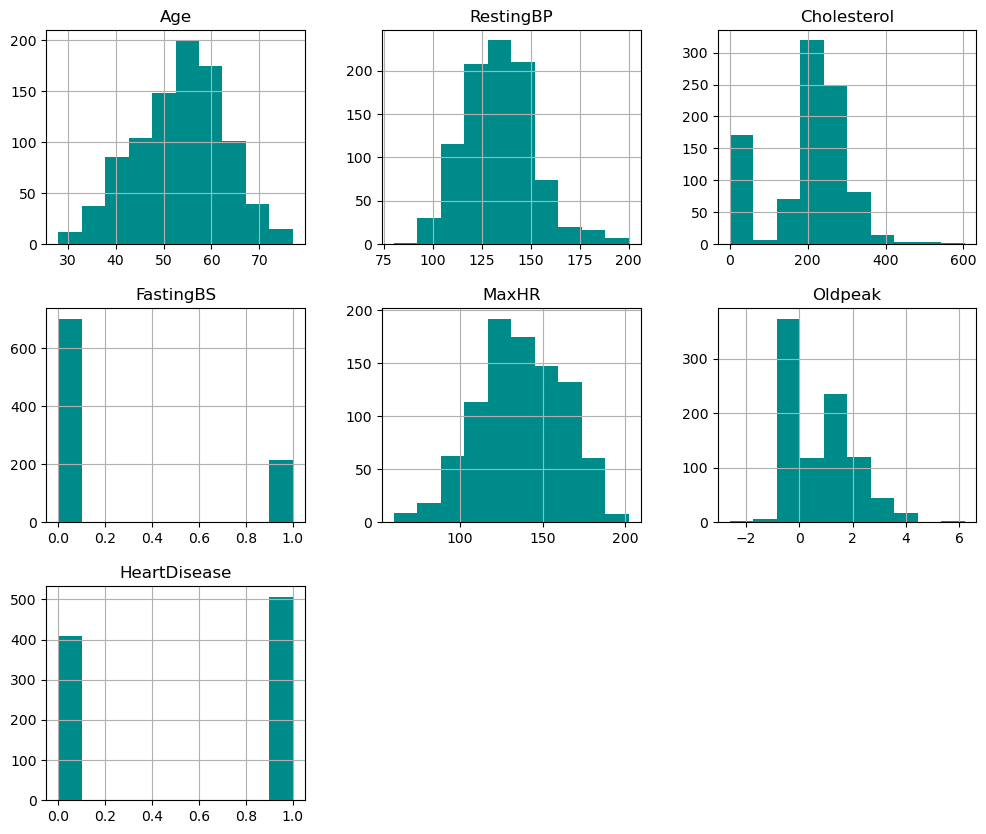

In [15]:
df.hist(figsize=(12,10),color='darkcyan')
plt.show()

In [16]:
# Convert categorical data to numeric with `pd.get_dummies`
heart_dummies_df = pd.get_dummies(df)

heart_dummies_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [17]:
#The original columns for the dummies have been dropped automatically
heart_dummies_df.columns.values.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

## Create the labels set (`y`) from the `“HeartDisease”` column, and then create the features (`X`) DataFrame from the remaining columns.


In [18]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = heart_dummies_df['HeartDisease']

# Separate the X variable, the features
X = heart_dummies_df.drop(columns='HeartDisease')

In [19]:
# Review the y variable Series
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [20]:
# Review the X variable DataFrame
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


## Check the balance of the labels variable `(y)` by using the `value_counts` function.

In [21]:
# Check the balance of our target values
print(y.value_counts())

1    507
0    410
Name: HeartDisease, dtype: int64


## Split the data into training and testing datasets by using `train_test_split`.

In [22]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

## Models


### Create a `Logistic Regression Model` with the Original Data

**Step 1**: Fit a **`logistic regression model`** by using the **`training data`** (X_train and y_train).

In [23]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(max_iter=2000,
                                random_state=1)


# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=1)

In [24]:
#Validate the model w/ training data
#Use method 'score' to return the mean accuracy on the given test data and targets.

classifier.score(X_train, y_train)

0.8719068413391557

In [25]:
#Validate the model w/ testing data
#Use method 'score' to return the mean accuracy on the given test data and targets.
classifier.score(X_test, y_test)

0.8434782608695652

In [26]:
filename = 'Data/Logistic_Reg_Model_OD.h5'
with open (filename, 'wb') as file:
    pickle.dump(classifier, file)

**Step 2**:Save the **predictions** on the testing data labels by using the testing feature data **(`X_test`)** and the fitted model.

In [27]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(15)

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,0,0
9,1,0


**Step 3**: Evaluate the model’s performance

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [28]:
# Print the balanced_accuracy score of the model
acc_score =  balanced_accuracy_score(y_test, predictions)
# Display the accuracy score for the test dataset.

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8451282846290985


In [29]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,83,14
Actual 1,22,111


In [30]:
# Print the classification report for the model
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        97
           1       0.89      0.83      0.86       133

    accuracy                           0.84       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.84      0.84       230



### Predict a `Logistic Regression Model` with `Resampled` Training Data

**Step 1**: Use the `RandomOverSampler` module from the `imbalanced-learn` library to resample the data. Be sure to confirm that the labels have an equal number of data points.

In [31]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resam, y_resam = ros.fit_resample(X_train, y_train)

In [32]:
# Count the distinct values of the resampled labels data
y_resam.value_counts()

1    374
0    374
Name: HeartDisease, dtype: int64

**Step 2**: Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.

In [33]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ros_model = LogisticRegression(max_iter=2000,random_state=1)

# Fit the model using the resampled training data
ros_model.fit(X_resam, y_resam)



LogisticRegression(max_iter=2000, random_state=1)

In [34]:
filename = 'Data/Logistic_Reg_Model_ROS.h5'
with open (filename, 'wb') as file:
    pickle.dump(classifier, file)

In [35]:
# Make a prediction using the testing data
ros_predictions = ros_model.predict(X_test)

#put predictions into a dataframe
ros_predictions_df_2 = pd.DataFrame({'Predictions': ros_predictions, 'Actual': y_test})
ros_predictions_df_2.head(15)

,Predictions,Actual
701,0,0
530,1,1
789,0,0
829,0,0
371,1,1
817,1,1
465,0,0
755,1,1
65,0,0
802,0,0


**Step 3**: Evaluate the model’s performance

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [36]:
# Print the balanced_accuracy score of the model 
print('Balanced Accuracy Score: %.3f' % balanced_accuracy_score(y_test, ros_predictions))

Balanced Accuracy Score: 0.861


In [37]:
# Generate a confusion matrix for the model
ros_cm_df = pd.DataFrame(
    confusion_matrix(y_test, ros_predictions),index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
ros_cm_df

,Predicted 0,Predicted 1
Actual 0,86,11
Actual 1,22,111


In [38]:
# Print the classification report for the model
print(classification_report(y_test, ros_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        97
           1       0.91      0.83      0.87       133

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



## Predict a Random Forest model



In [39]:
X.columns.values.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [40]:
#verify y
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

**Step 1**: Use the **StandardScaler** to scale the features data, remember that only **`X_train`** and **`X_testing`** DataFrames should be scaled.

In [41]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [42]:
print('Scaler results:', scaler.transform(X_train)[:1])

Scaler results: [[-0.2721222  -0.09107932 -0.39838929  1.80020575 -0.29239116  0.10147671
  -0.51723078  0.51723078  0.92290412 -0.46699583 -0.55324827 -0.22103159
   2.02210012 -1.22400238 -0.50590661 -1.22400238  1.22400238 -0.28016591
   1.02207772 -0.88305874]]


In [43]:
#Save the scaler to an h5 file for Flask to pick up
filename = 'Data/X_scaler.h5'
with open (filename, 'wb') as file:
    pickle.dump(X_scaler, file)

In [44]:
#save the X_train columns as a variable list and output to h5
X_train_cols = [X_train.columns]

filename = 'Data/X_train_cols.h5'
with open (filename, 'wb') as file:
    pickle.dump(X_train_cols, file)

**Step 2**: Instantiate the random forest classifier


In [45]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=2000, random_state=78)

In [46]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [47]:
filename = 'Data/Random_Forest_model.h5'
with open (filename, 'wb') as file:
    pickle.dump(classifier, file)

In [48]:
# Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

**Step 3**: Evaluate the model’s performance

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [49]:
# Print the balanced_accuracy score of the model 
print('Balanced Accuracy Score: %.3f' % balanced_accuracy_score(y_test, predictions_rf))

Balanced Accuracy Score: 0.864


In [50]:
# Calculating the confusion matrix
rf_cm_df = pd.DataFrame(
    confusion_matrix(y_test, predictions_rf),index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
rf_cm_df

,Predicted 0,Predicted 1
Actual 0,83,14
Actual 1,17,116


In [108]:
# Print the classification report for the model
print(classification_report(y_test, predictions_rf))

ValueError: Found input variables with inconsistent numbers of samples: [184, 230]

## Predicting using the neural network

In [52]:
# Separate the data into labels and features

# Separate the y variable, the labels
y1 = heart_dummies_df['HeartDisease']

# Separate the X variable, the features
X1 = heart_dummies_df.drop(columns='HeartDisease')

In [53]:
# Review the y variable Series
y1[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [54]:
X1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [55]:
X1.shape

(917, 20)

In [87]:
# Split training/test datasets with the random state of 42
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=42, test_size = 0.2)

#Split training/test datasets for validation with the random state of 42 
X_train, X_val, y_train, y_val = train_test_split(X1, y1, random_state=42, test_size = 0.25)

In [88]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [89]:
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=20))
# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 861 (3.36 KB)
Trainable params: 861 (3.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [100]:
# Train the model
#  YOUR CODE GOES HERE
model = nn.fit(X_train,y_train,epochs=50)

Epoch 1/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8515
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8675
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8705
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8661
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8719
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8821
Epoch 7/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8472
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8355
Epoch 9/50
22/22 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8675
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.8894
Epoch 11/50
22/22 [

In [103]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.5650 - accuracy: 0.8424 - 38ms/epoch - 6ms/step
Loss: 0.5650282502174377, Accuracy: 0.842391312122345


In [104]:
filename = 'Data/nn_model.h5'
with open (filename, 'wb') as file:
    pickle.dump(nn, file)